In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.random.seed(2)

from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, SGD, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping,ModelCheckpoint
from keras.layers import BatchNormalization
from tensorflow.contrib.learn.python.learn.datasets.mnist import extract_images, extract_labels
from keras import regularizers



In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Reading the Data
def read_data():
    fashion_mnist=keras.datasets.fashion_mnist
    (train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()
    return train_images,train_labels,test_images,test_labels

In [0]:
# Checking the size of data
def check_size(train_images,train_labels,test_images,test_labels):
    m_train = train_images.shape[0]
    num_px = train_images.shape[1]
    m_test = test_images.shape[0]

    print ("Number of training examples: " + str(m_train))
    print ("Number of testing examples: " + str(m_test))
    print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 1)")
    print ("train_images shape: " + str(train_images.shape))
    print ("train_labels shape: " + str(train_labels.shape))
    print ("test_images shape: " + str(test_images.shape))
    print ("test_labels shape: " + str(test_labels.shape))

In [0]:
def sizing_norm(train_images,test_images):    
    train_images_flatten = train_images.reshape(-1,28,28,1)
    test_images_flatten = test_images.reshape(-1,28,28,1)
    x_train = train_images_flatten/255
    x_test = test_images_flatten/255
    print("Train_Images: ",train_images_flatten.shape)
    print("Test_Images: ",test_images_flatten.shape)
    print("***************")
    print("X_train: ",x_train.shape)
    print("X_test: ",x_test.shape)
    return x_train,x_test

In [0]:
# One hot encoding the labels
def one_hot_encode(train_labels,test_labels):
    y_train= to_categorical(train_labels, num_classes = 10)
    y_test= to_categorical(test_labels,num_classes=10)
    return y_train,y_test

In [0]:
#Checking for null values
def null_check(x_train,x_test):
    print("Null Values in x_train: ",np.isnan(x_train).any())
    print("Null Values in x_test: ",np.isnan(x_test).any())

In [0]:
# Splitting train data intp train and validation data
def train_val_split(x_train,y_train):
    x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=2)
    print("X_train ",x_train.shape)
    print("X_val ",x_val.shape)
    print("Y_train",y_train.shape)
    print("Y_val",y_val.shape)
    return x_train,x_val,y_train,y_val


In [0]:
def cnn_model_fn():
    model = Sequential()

    model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    
    model.add(MaxPool2D(pool_size=(2,2),strides=2))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="Same",activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(filters=128,kernel_size=(3,3),padding="Same",activation='relu'))
    model.add(BatchNormalization())
    
    model.add(MaxPool2D(pool_size=(2,2), strides=2))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(filters=256,kernel_size=(3,3),padding="Same",activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(filters=512,kernel_size=(3,3),padding="Same",activation='relu'))
    model.add(BatchNormalization())
    
    model.add(MaxPool2D(pool_size=(2,2), strides=2))
    
    model.add(Conv2D(filters=256,kernel_size=(3,3),padding="Same",activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(filters=128,kernel_size=(3,3),padding="Same",activation='relu'))
    model.add(BatchNormalization())
    
    model.add(MaxPool2D(pool_size=(2,2), strides=2))
    
    

    model.add(Flatten())
    model.add(Dense(128, activation = "relu",kernel_regularizer=regularizers.l2(0.1)))
    
    model.add(Dense(10, activation = "softmax"))


    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
    model.summary()
    return model

In [0]:
#Data Augmentation
def data_aug(x_train):
    datagen=ImageDataGenerator(featurewise_center=False,
                              samplewise_center=False,
                              featurewise_std_normalization=False,
                              samplewise_std_normalization=False,
                              zca_whitening=False,
                              rotation_range=0,
                              zoom_range=0.01,
                              width_shift_range=0.03,
                              height_shift_range=0.03,
                              horizontal_flip=True,
                              vertical_flip=True)
    datagen.fit(x_train)
    
    return datagen

In [0]:
#Plotting the losses
def plot_la(train_model):
    fig, ax = plt.subplots(2,1)
    ax[0].plot(train_model.history['loss'], color='b', label="Training loss")
    ax[0].plot(train_model.history['val_loss'], color='r', label="validation loss",axes =ax[0])
    legend = ax[0].legend(loc='best', shadow=True)
    plt.ylabel("Validation Loss")
    plt.xlabel("#Epochs")

    ax[1].plot(train_model.history['acc'], color='b', label="Training accuracy")
    ax[1].plot(train_model.history['val_acc'], color='r',label="Validation accuracy")
    legend = ax[1].legend(loc='best', shadow=True)
    plt.ylabel("Accuracy")
    plt.xlabel("#Epochs")
    plt.show()

Number of training examples: 60000
Number of testing examples: 10000
Each image is of size: (28, 28, 1)
train_images shape: (60000, 28, 28)
train_labels shape: (60000,)
test_images shape: (10000, 28, 28)
test_labels shape: (10000,)
Train_Images:  (60000, 28, 28, 1)
Test_Images:  (10000, 28, 28, 1)
***************
X_train:  (60000, 28, 28, 1)
X_test:  (10000, 28, 28, 1)
Null Values in x_train:  False
Null Values in x_test:  False
X_train  (48000, 28, 28, 1)
X_val  (12000, 28, 28, 1)
Y_train (48000, 10)
Y_val (12000, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_125 (Conv2D)          (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization_153 (Bat (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 28, 28, 32)        4640      
_____________

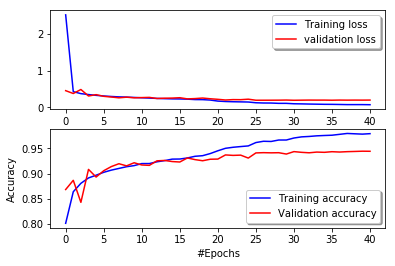

Test loss: 0.21695017881989478
Test accuracy: 93.91000000000001
RESULTS:
 [9 2 1 ... 8 1 5]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_133 (Conv2D)          (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization_162 (Bat (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 28, 28, 32)        4640      
_________________________________________________________________
batch_normalization_163 (Bat (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_81 (Dropout)         (None, 14, 14, 32)        0         
__________________________________________________

In [35]:
def main():
    epochs=50
    batch_size=128
    
    train_images,train_labels,test_images,test_labels=read_data()
    
    check_size(train_images,train_labels,test_images,test_labels)
    
    #Normalization
    x_train,x_test= sizing_norm(train_images,test_images)
    
    #One hot encoding
    y_train,y_test= one_hot_encode(train_labels,test_labels)
    
    #Null Check
    null_check(x_train,x_test)
    #Splitting train data into validation and train
    x_train,x_val,y_train,y_val=train_val_split(x_train,y_train)
    
    #Data Augmentation Function Call
    datagen=data_aug(x_train)
    #optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
    #optimizer=SGD(lr=0.01,decay=1e-6,momentum=0.9)
    optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    
    #Function call for CNN
    model=cnn_model_fn()
    model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])
    
    #Function call for Data Augmentation
    datagen=data_aug(x_train)
    
    learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
    
    ES=EarlyStopping(monitor='val_loss', 
                     min_delta=0, 
                     patience=10, 
                     verbose=1,
                     mode='auto', 
                     baseline=None,
                     restore_best_weights=False)
    
    model_save_name = 'cp.ckpt'
    path = F"/content/gdrive/My Drive/{model_save_name}"
    mcp_save = ModelCheckpoint(path, save_best_only=True, monitor='val_acc', mode='auto',verbose=1)
    
    train_model=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),
                                epochs=epochs,
                                validation_data=(x_val,y_val),
                                steps_per_epoch=x_train.shape[0]//batch_size,    
                                verbose=1,
                                callbacks=[learning_rate_reduction,ES,mcp_save])
    #model.save("my_model.h5")
    score = model.evaluate(x_test, y_test, verbose=0)
    #print(train_model.history)
    #model.save("/home/dhruv/Desktop/Assignment/Assignment-5/my_model.h5")
    plot_la(train_model)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1]*100)
    results=model.predict(x_test)
    results=np.argmax(results,axis=1)
    print("RESULTS:\n",results)
    
    
    
    model=cnn_model_fn()
    model.load_weights(path)

    score = model.evaluate(x_test, y_test, verbose=1)
    print('Test loss with loaded model:', score[0])
    print('Test accuracy with loaded model:', score[1]*100)
    
    
if __name__=='__main__':
    main()